In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

#### Removing columns where all rows are NA

In [4]:
df = df.drop(axis=1, columns = df.columns[df.isna().all()].tolist())

In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Data Cleaning

#### Fixing columns where entry count is not 39717

In [7]:
df['emp_length'] = df['emp_length'].fillna(0)
df['emp_title'] = df['emp_title'].fillna('Unknown')


#### Dropping unnecessary columns

In [8]:
# dropping desc, tax_liens (all values are 0),id,
# next_pymnt_d - only 1140 values are present
# chargeoff_within_12_mths - all values are 0
# pymnt_plan - all values are n
# out_prncp - most values are 0
# out_prncp_inv - most values are 0
# pub_rec_bankruptcies - most values are 0
# acc_now_delinq - all values are 0
# delinq_amnt - all values are 0
# initial_list_status - all values are f
# policy_code - all values are 1
# collections_12_mths_ex_med - all values are 0
# emp_title - 2459 unique values
# application_type - all values are individual
# delinq_2yrs - 32000 values are 0
# pub_rec - 34000 values are 0
df = df.drop(labels=['desc', 'tax_liens', 'id', 'url', 'title', 'zip_code', 'mths_since_last_delinq',
                     'mths_since_last_record','next_pymnt_d', 'chargeoff_within_12_mths', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 
                     'pub_rec_bankruptcies', 'acc_now_delinq', 'delinq_amnt', 'initial_list_status', 
                     'policy_code', 'collections_12_mths_ex_med', 'emp_title', 'application_type', 'delinq_2yrs', 
                     'pub_rec'], axis=1)   


#### Dropping redundant rows

In [9]:
# last_credit_pull_d - has 2 missing values - so deleting the rows
# revol_util - has 50 missing values - so deleting the rows
df = df[df['last_credit_pull_d'].notna()]
df = df[df['revol_util'].notna()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39665 non-null  int64  
 1   loan_amnt                39665 non-null  int64  
 2   funded_amnt              39665 non-null  int64  
 3   funded_amnt_inv          39665 non-null  float64
 4   term                     39665 non-null  object 
 5   int_rate                 39665 non-null  object 
 6   installment              39665 non-null  float64
 7   grade                    39665 non-null  object 
 8   sub_grade                39665 non-null  object 
 9   emp_length               39665 non-null  object 
 10  home_ownership           39665 non-null  object 
 11  annual_inc               39665 non-null  float64
 12  verification_status      39665 non-null  object 
 13  issue_d                  39665 non-null  object 
 14  loan_status              39

#### Looking into object dtypes which should be numeric or float

In [11]:
# term can be converted to int
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [12]:
# int_rate can be converted to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0]))

In [13]:
# revol_util can be converted to float
df['revol_util'] = df['revol_util'].apply(lambda x: float(x.split('%')[0]))


In [14]:
df.to_csv('cleaned_loan.csv', index=False)

#### Removing outliers (we came to this while doing univariate analysis)

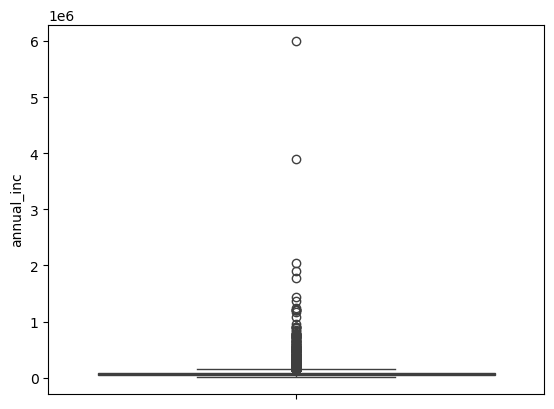

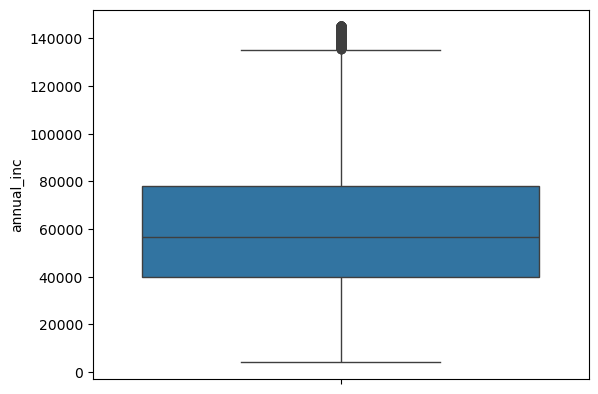

In [15]:
# There's a possibility of outliers in annual_inc, came to know while doing univariate analysis

sns.boxplot(df['annual_inc'])
plt.show()

# Let's remove the outliers

q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['annual_inc'] > lower_bound) & (df['annual_inc'] < upper_bound)]

sns.boxplot(df['annual_inc'])
plt.show()

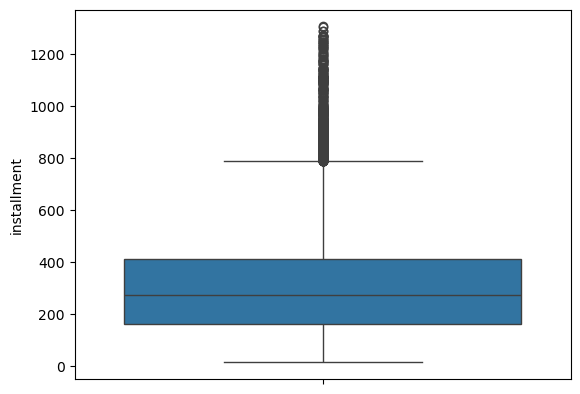

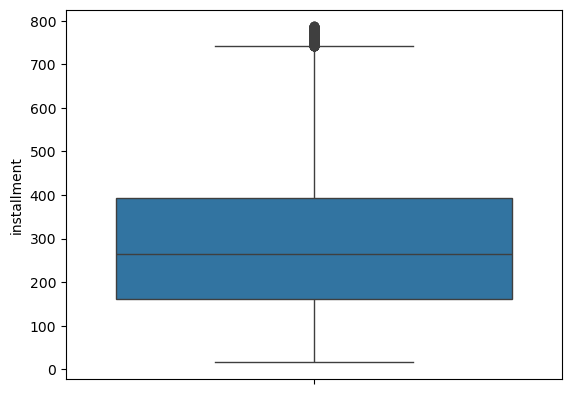

In [16]:
# Remove outliers in installment

sns.boxplot(df['installment'])
plt.show()

q1 = df['installment'].quantile(0.25)
q3 = df['installment'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['installment'] > lower_bound) & (df['installment'] < upper_bound)]

sns.boxplot(df['installment'])
plt.show()

#### Distribute based on defaulters, non-defaulters and current

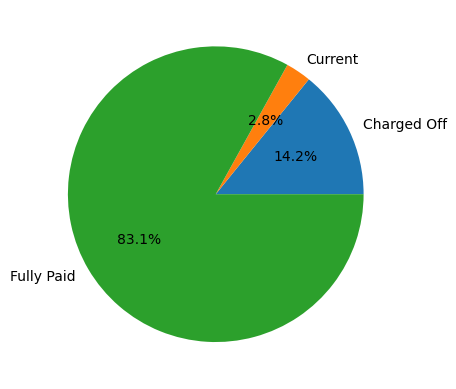

In [17]:
grouped_loadstatus = df.groupby('loan_status')['member_id'].count()
plt.pie(grouped_loadstatus, labels=grouped_loadstatus.index, autopct='%1.1f%%')
plt.show()

#### Getting rid of 2.9% of people who are currently paying off the loan

In [18]:
df = df[df['loan_status'] != 'Current']

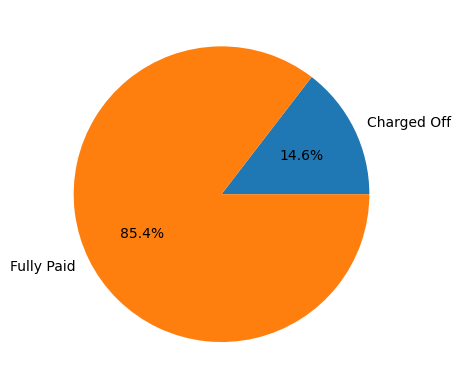

In [19]:
plt.pie(df.groupby('loan_status')['member_id'].count(), labels=df.groupby('loan_status')['member_id'].count().index, autopct='%1.1f%%')
plt.show()

14.6% of total people have defaulted,

we need to find out what defaulters have or do different than the people who fully pay their loan

In [20]:
df.shape


(35451, 34)

In [21]:
defaulters = df[df['loan_status'] == 'Charged Off']
non_defaulters = df[df['loan_status'] == 'Fully Paid']

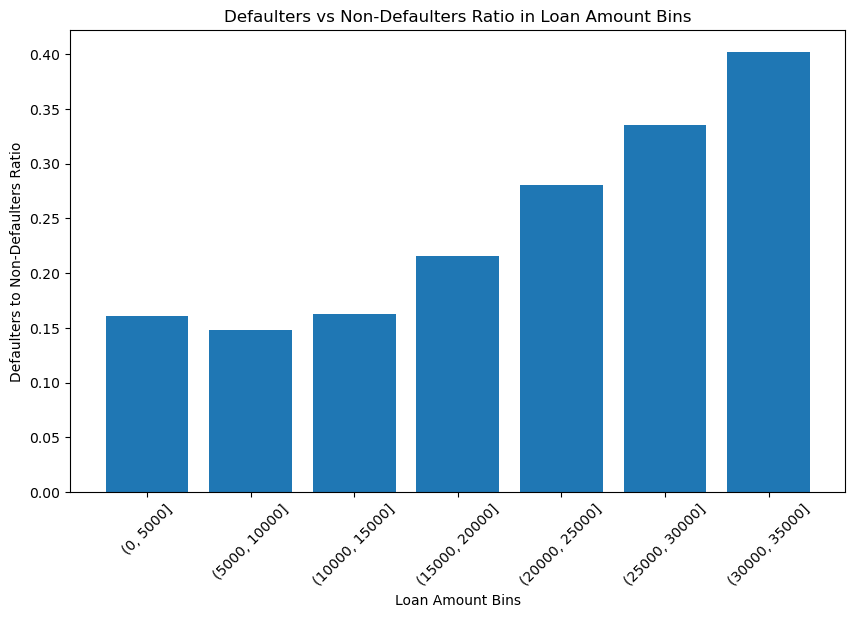

In [22]:
# Based on the loan amount

# Create bins for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Group defaulters and non-defaulters by loan amount bins
defaulters_bins = defaulters.groupby(pd.cut(defaulters['loan_amnt'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['loan_amnt'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin
ratio = defaulters_bins / fullypaid_bins

# Plot the ratio
plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Loan Amount Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Loan Amount Bins')
plt.xticks(rotation=45)
plt.show()


##### We notice that ratio of defaulters increase as the loan amount increases

[0.12460654 0.33978328]
[36 60]


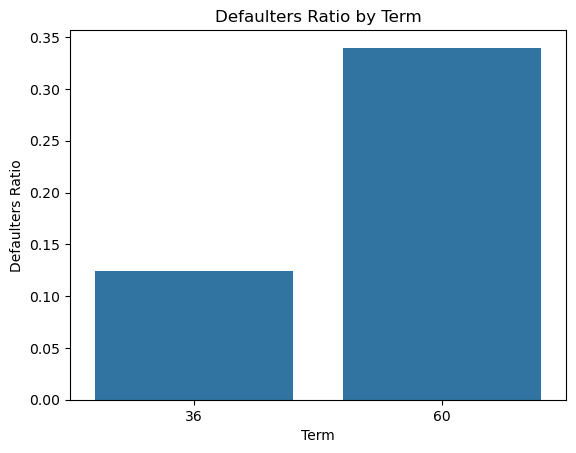

In [23]:

# Calculate defaulters/non_defaulters ratio for each term
defaulters_ratio = defaulters.groupby('term').size() / non_defaulters.groupby('term').size()
print(defaulters_ratio.values)
print(df['term'].unique())

# Plotting the bar plot
sns.barplot(x=defaulters_ratio.index, y=defaulters_ratio.values)
plt.xlabel('Term')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term')
plt.show()

We notice that as term increases the number of defaulters to non-defaulters ratio also increases
This means that higher the term the higher the defaulters number

In [24]:
# based on interest rate
defaulters['int_rate'].value_counts().sort_index()

int_rate
5.42     20
5.79     16
5.99     19
6.03      5
6.17     10
         ..
23.22     1
23.52     2
23.59     1
24.11     1
24.40     1
Name: count, Length: 318, dtype: int64

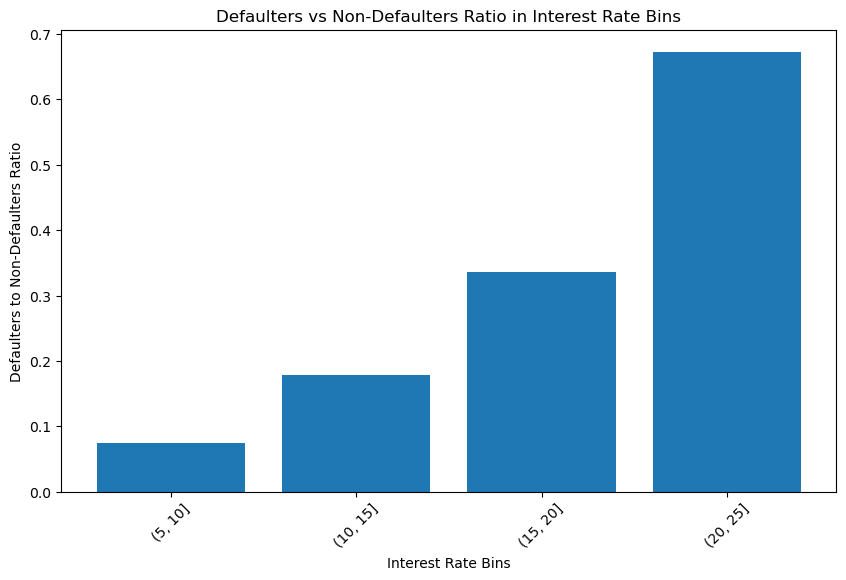

In [25]:
bins = [0, 5, 10, 15, 20, 25]
defaulters_bins = defaulters.groupby(pd.cut(defaulters['int_rate'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['int_rate'], bins)).size()

ratio = defaulters_bins / fullypaid_bins

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Interest Rate Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Interest Rate Bins')
plt.xticks(rotation=45)
plt.show()

We observe that ratio of defaulters also increases as interest rate increases.

Therefore we can say higher the interest rate higher the chances of defaulting

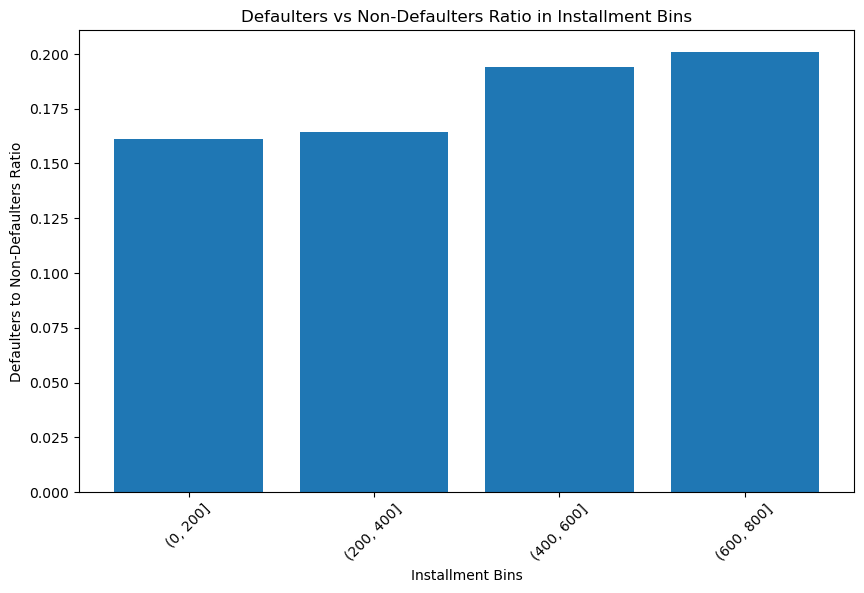

In [26]:
# based on installment
df['installment'].value_counts().sort_index()
# we see values from 15.69 to 1305.19
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
defaulters_bins = defaulters.groupby(pd.cut(defaulters['installment'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['installment'], bins)).size()

ratio = defaulters_bins / fullypaid_bins

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Installment Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Installment Bins')
plt.xticks(rotation=45)
plt.show()




We notice a trend for installment and defaulters ratio go hand in hand

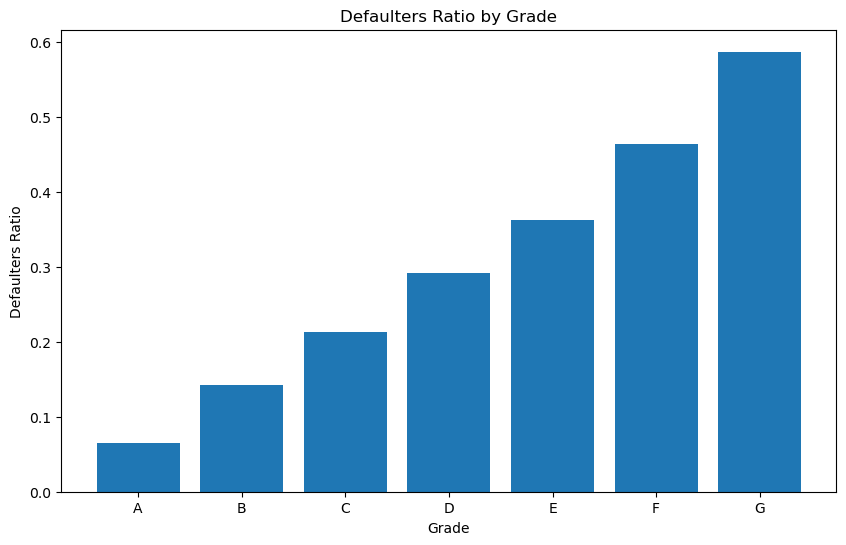

In [27]:
# Let's analyze for grade

# Create a pivot table
pivot = df.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters
pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Grade')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Grade')
plt.show()


We observe that the defaulters rate increases as the grade increases

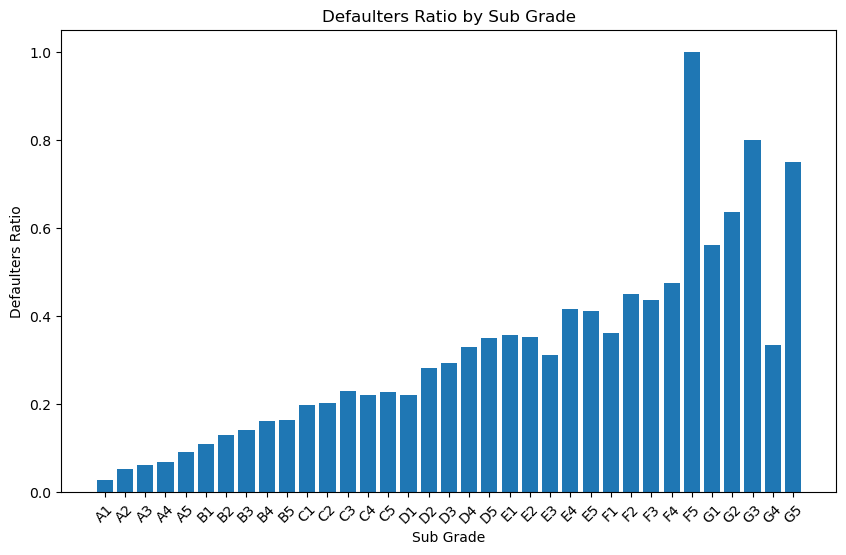

In [28]:
# Let's analyze for sub_grade

# Create a pivot table
pivot = df.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters
pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Sub Grade')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Sub Grade')
plt.xticks(rotation=45)
plt.show()

We observe the trend that defaulters increase as sub-grade moves from A1 to G5

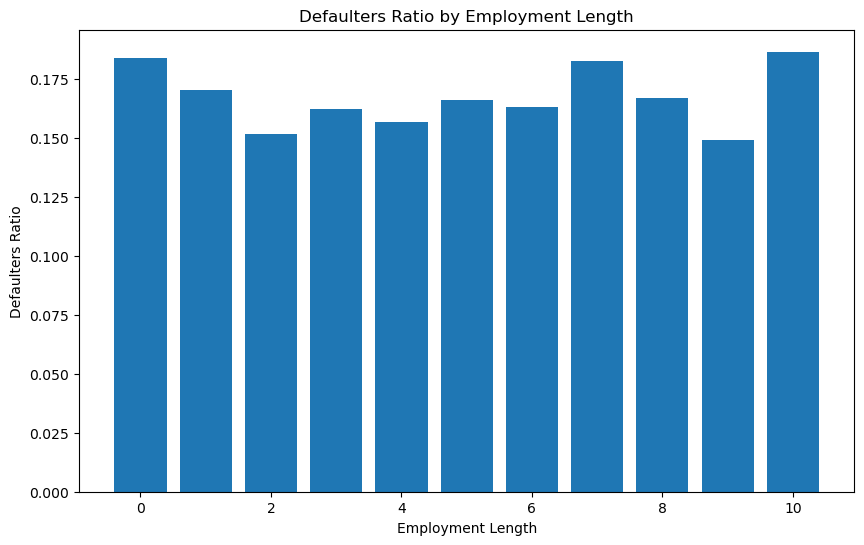

In [29]:
# Let's clean emp_length

df['emp_length'].value_counts()

# Replace < 1 year with 0
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x == '< 1 year' else x)

# Replace 10+ years with 10
df['emp_length'] = df['emp_length'].apply(lambda x: 10 if x == '10+ years' else x)

df['emp_length'] = df['emp_length'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

df['emp_length'].value_counts()

# Let's analyze for emp_length

# Create a pivot table

pivot = df.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Employment Length')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Employment Length')
plt.show()


We observe no corellation between defaulters and the length of their employment

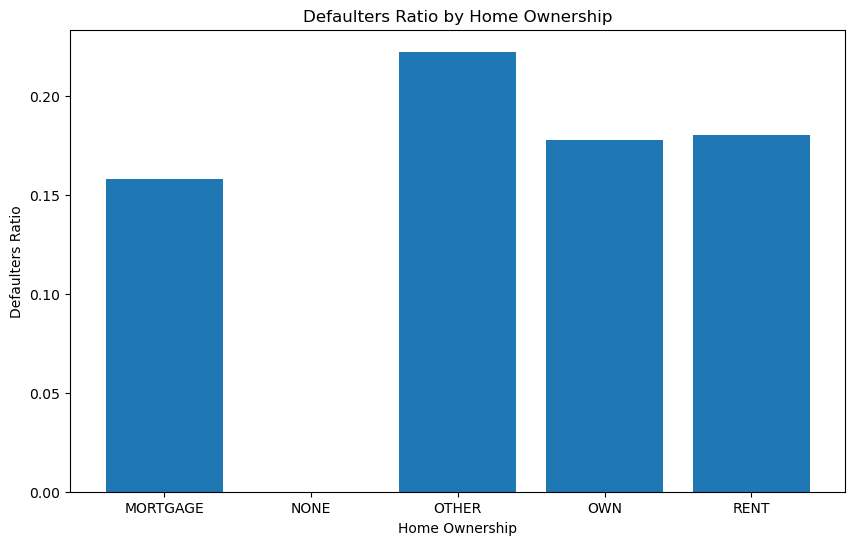

In [30]:
# Let's analyse for home_ownership

# Create a pivot table
pivot = df.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Home Ownership')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Home Ownership')
plt.show()


We notice no relation with home ownership and defaulters except that "Other" section has more of defaulters. But we don't know what values Others have in it

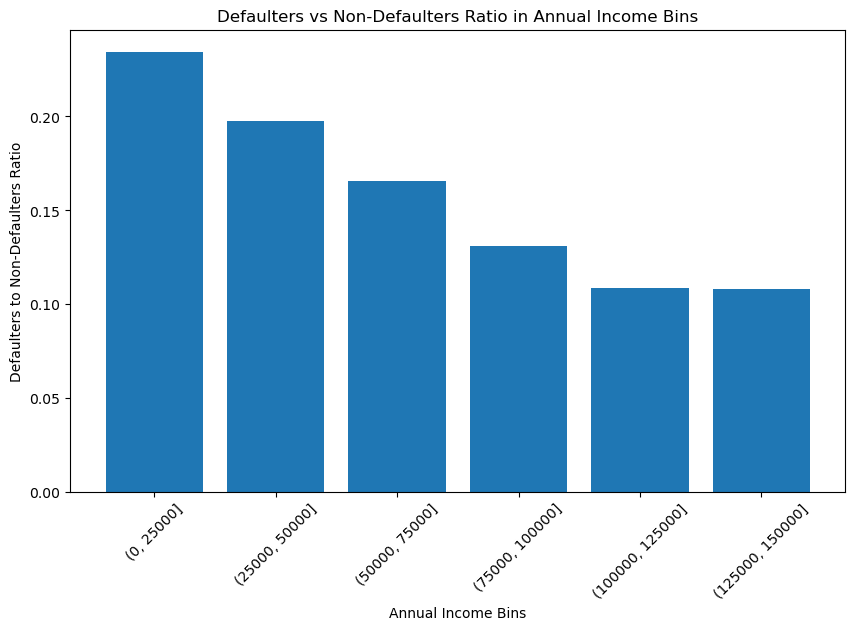

In [31]:
# Create bins for annual_inc

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]

# Group defaulters and non-defaulters by annual_inc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['annual_inc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['annual_inc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Annual Income Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Annual Income Bins')
plt.xticks(rotation=45)
plt.show()

We observe as annual salary increases ratio of defaulters decreases. There is a co-relation between salary and defaulters

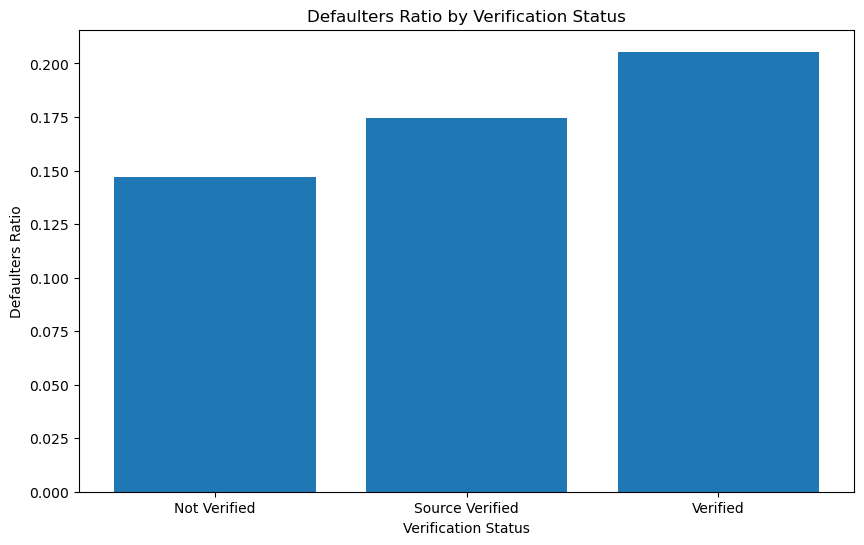

In [32]:
# Let's analyze for verification_status

# Create a pivot table

pivot = df.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Verification Status')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Verification Status')

plt.show()

We observe that defaulters rate increases for verified annual income. So there may be no relation between income verification and defaulters

In [33]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

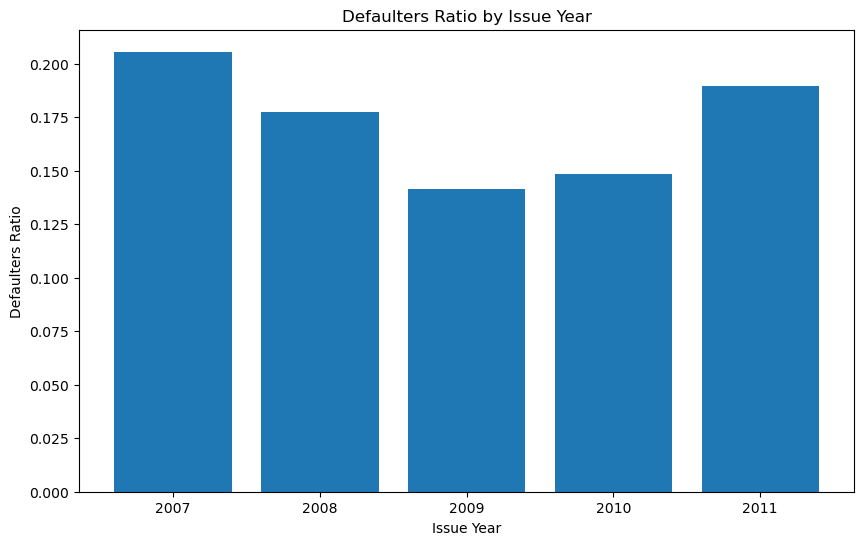

In [34]:
# Create a pivot table for issue year

pivot = df.pivot_table(index='issue_year', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Issue Year')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Issue Year')
plt.show()

No relation with issue year and defaulters

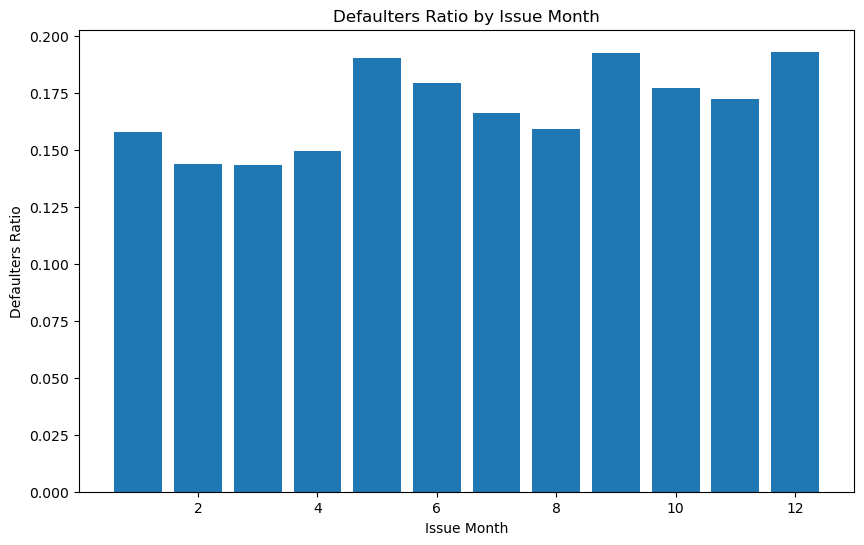

In [35]:
# Create a pivot table for issue month

pivot = df.pivot_table(index='issue_month', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Issue Month')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Issue Month')
plt.show()

No relation with issue month and defaulters

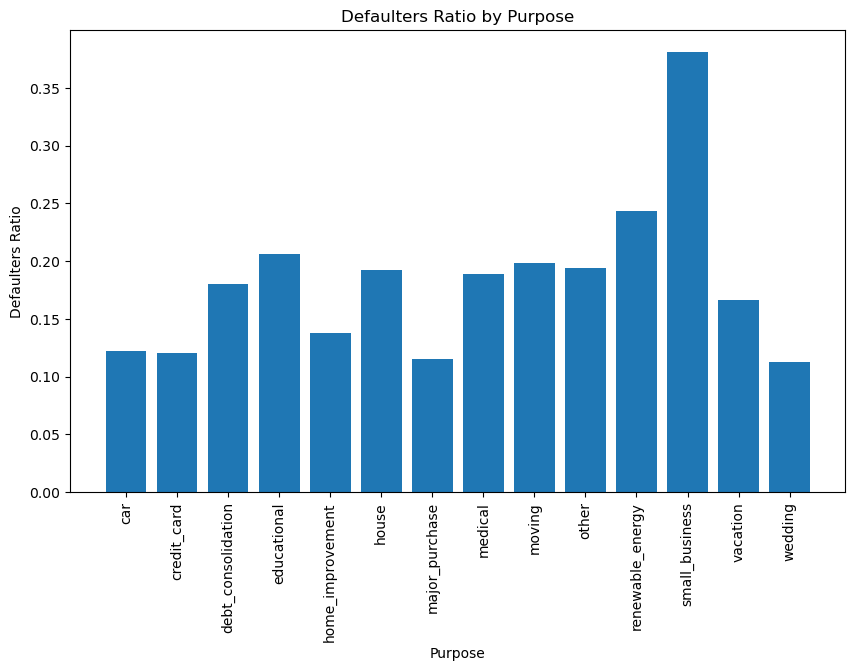

In [36]:
# Let's analyze for purpose

# Create a pivot table

pivot = df.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))

plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Purpose')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose')
plt.xticks(rotation=90)
plt.show()


We observe that members who have taken loan for small business tend to default more about 40%

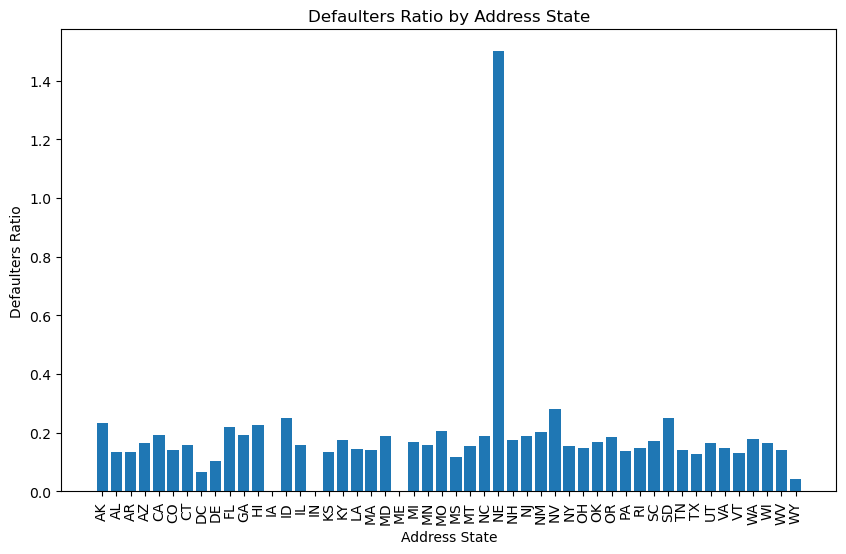

In [37]:
# Let's analyze for addr_state

# Create a pivot table

pivot = df.pivot_table(index='addr_state', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Address State')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Address State')
plt.xticks(rotation=90)
plt.show()

We observe that members from the state of NE have the highest defaulters ratio.

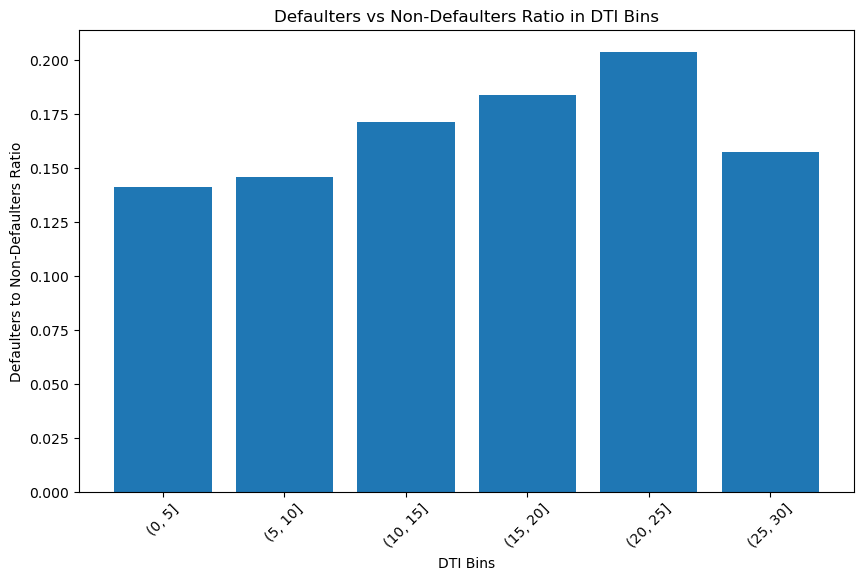

In [38]:
# Let's analyze for dti

df['dti'].value_counts().sort_index()   

# Create bins for dti

bins = [0, 5, 10, 15, 20, 25, 30]

# Group defaulters and non-defaulters by dti bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['dti'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['dti'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('DTI Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in DTI Bins')
plt.xticks(rotation=45)
plt.show()

we observe a trend that defaulters increase as dti increases

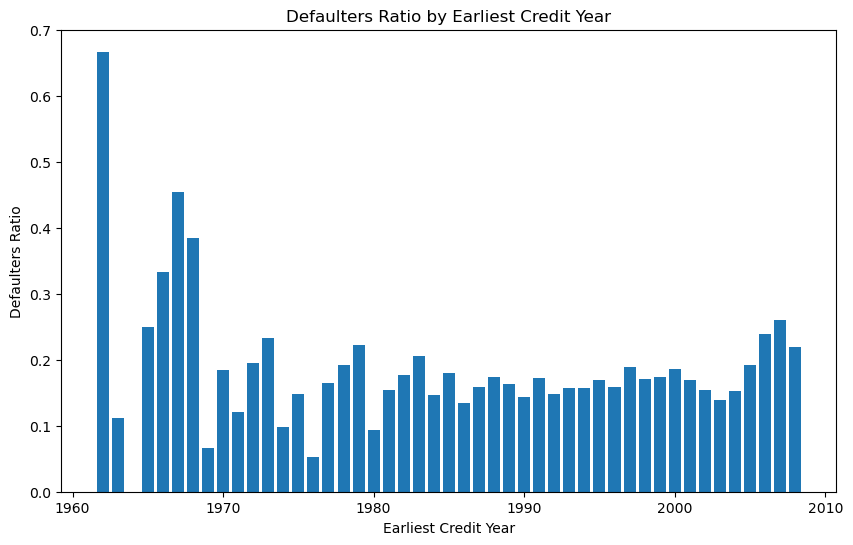

In [39]:
# Let's analyze for earliest_cr_line

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df.loc[df['earliest_cr_line'].dt.year >= 2020, 'earliest_cr_line'] -= pd.DateOffset(years=100)

df['earliest_cr_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

# Create a pivot table for earliest_cr_year

pivot = df.pivot_table(index='earliest_cr_year', columns='loan_status', values='member_id', aggfunc='count')

# Calculate the ratio of defaulters to non-defaulters

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot['ratio'])
plt.xlabel('Earliest Credit Year')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Earliest Credit Year')
plt.show()


We don't see any relation between year and earliest_cr_line. Only that in 196x we see high defaulters once

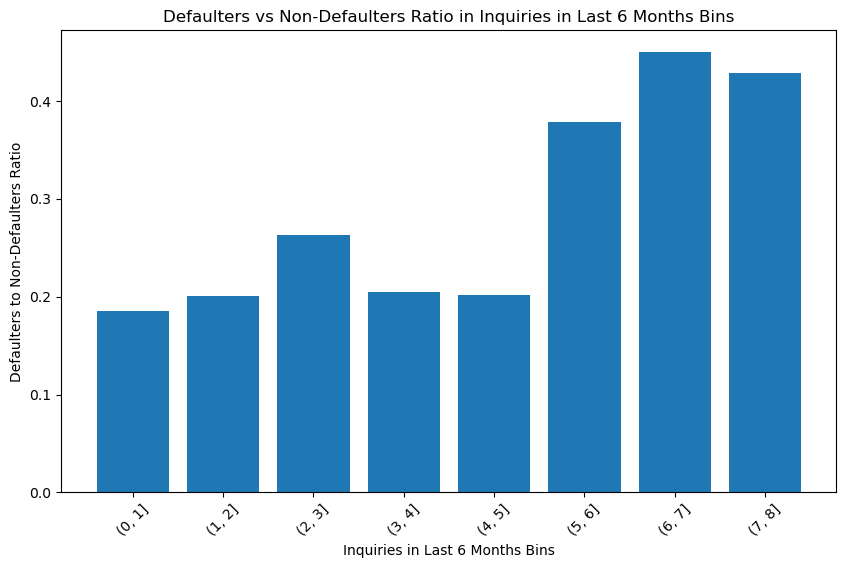

In [40]:
# Let's analyze for inq_last_6mths

df['inq_last_6mths'].value_counts().sort_index()

# Create bins for inq_last_6mths

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Group defaulters and non-defaulters by inq_last_6mths bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['inq_last_6mths'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['inq_last_6mths'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Inquiries in Last 6 Months Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Inquiries in Last 6 Months Bins')
plt.xticks(rotation=45)
plt.show()



No relation between inq_last_6mths and defaulters

In [41]:
df['issue_d'].value_counts().sort_index()

issue_d
2007-06-01       1
2007-07-01      23
2007-08-01      29
2007-09-01      15
2007-10-01      46
2007-11-01      30
2007-12-01      73
2008-01-01     156
2008-02-01     166
2008-03-01     205
2008-04-01     147
2008-05-01      69
2008-06-01      65
2008-07-01      81
2008-08-01      66
2008-09-01      29
2008-10-01      87
2008-11-01     174
2008-12-01     201
2009-01-01     226
2009-02-01     250
2009-03-01     266
2009-04-01     271
2009-05-01     299
2009-06-01     336
2009-07-01     346
2009-08-01     388
2009-09-01     428
2009-10-01     482
2009-11-01     538
2009-12-01     514
2010-01-01     513
2010-02-01     553
2010-03-01     658
2010-04-01     752
2010-05-01     848
2010-06-01     982
2010-07-01    1065
2010-08-01    1000
2010-09-01    1014
2010-10-01    1052
2010-11-01    1064
2010-12-01    1198
2011-01-01    1290
2011-02-01    1201
2011-03-01    1321
2011-04-01    1444
2011-05-01    1504
2011-06-01    1572
2011-07-01    1608
2011-08-01    1626
2011-09-01    1724
2011

<Axes: ylabel='open_acc'>

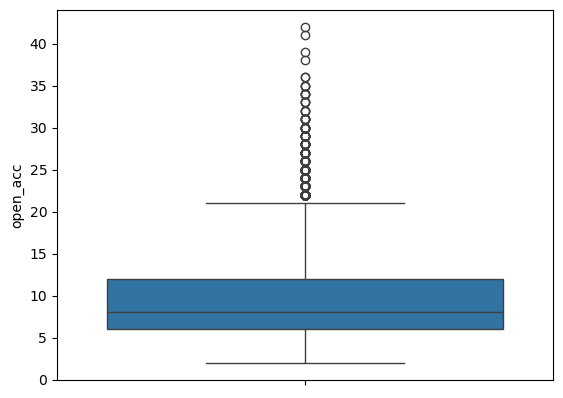

In [42]:
# Let's analyze for open_acc

df['open_acc'].value_counts().sort_index()

# Look for outliers in open_acc

sns.boxplot(df['open_acc'])

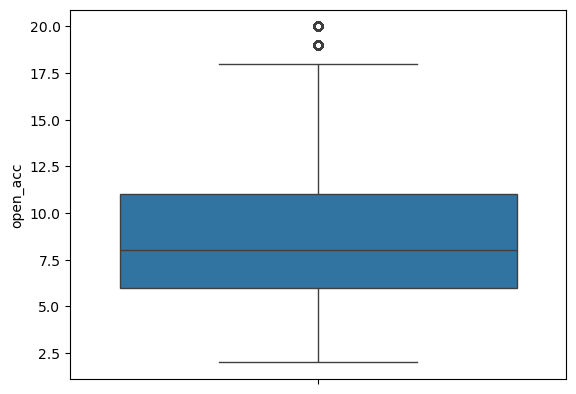

In [43]:
# Remove outliers in open_acc

q1 = df['open_acc'].quantile(0.25)
q3 = df['open_acc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['open_acc'] > lower_bound) & (df['open_acc'] < upper_bound)]

sns.boxplot(df['open_acc'])
plt.show()

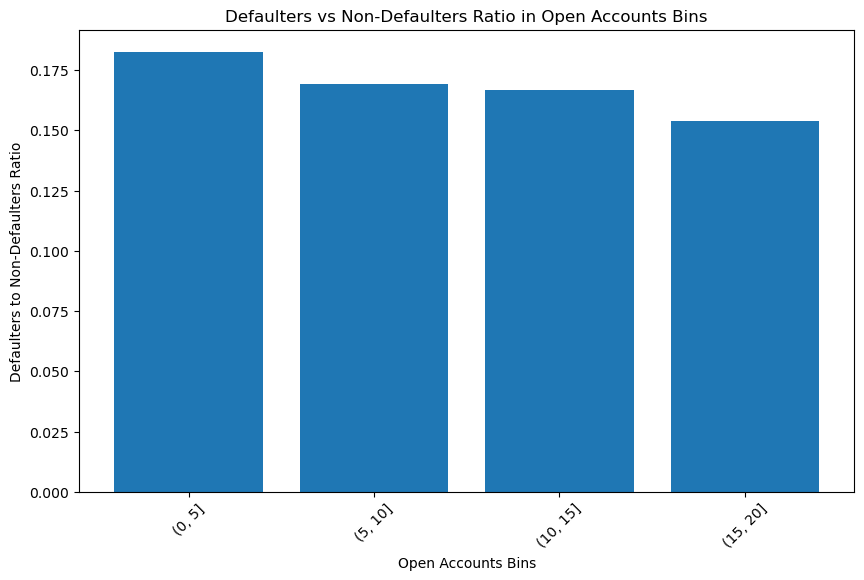

In [44]:

# Create bins for open_acc

bins = [0, 5, 10, 15, 20]

# Group defaulters and non-defaulters by open_acc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['open_acc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['open_acc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Open Accounts Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Open Accounts Bins')
plt.xticks(rotation=45)
plt.show()


No relation between open_acc and defaulter. It's almost constant

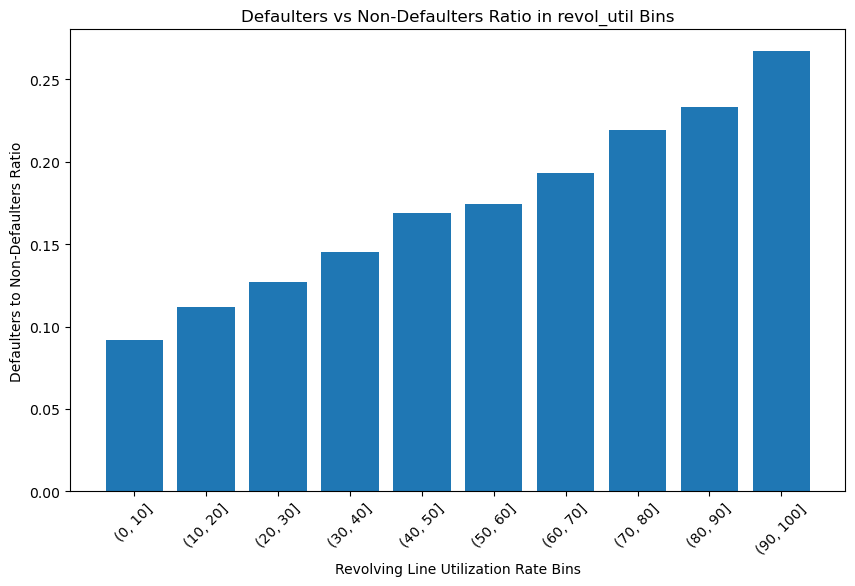

In [45]:
# Let's analyze for revol_util

df['revol_util'].value_counts().sort_index()

# Create bins for revol_util

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Group defaulters and non-defaulters by revol_util bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['revol_util'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['revol_util'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins

# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Revolving Line Utilization Rate Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in revol_util Bins')
plt.xticks(rotation=45)
plt.show()


We observe that the defaulters ratio increases as the revol_util increases

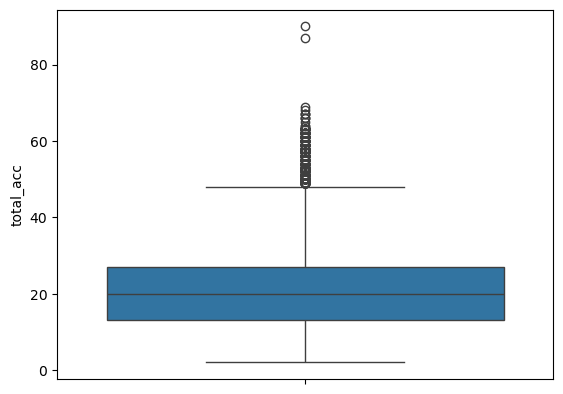

In [46]:
# Let's analyze for total_acc

df['total_acc'].value_counts().sort_index()

# Look for outliers in total_acc

sns.boxplot(df['total_acc'])
plt.show()

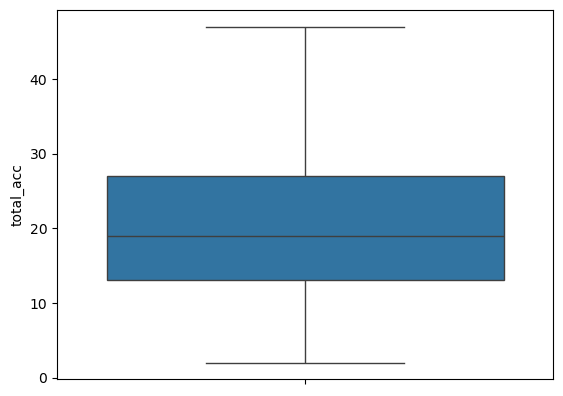

In [47]:
# Remove outliers in total_acc

q1 = df['total_acc'].quantile(0.25)
q3 = df['total_acc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['total_acc'] > lower_bound) & (df['total_acc'] < upper_bound)]

sns.boxplot(df['total_acc'])
plt.show()


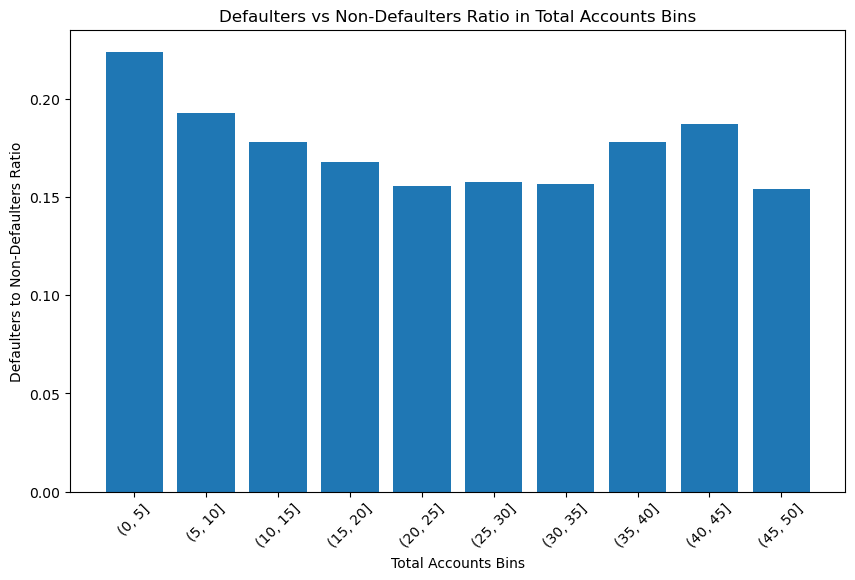

In [48]:

# Create bins for total_acc

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Group defaulters and non-defaulters by total_acc bins

defaulters_bins = defaulters.groupby(pd.cut(defaulters['total_acc'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['total_acc'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin

ratio = defaulters_bins / fullypaid_bins


# Plot the ratio

plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Total Accounts Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Total Accounts Bins')
plt.xticks(rotation=45)
plt.show()


No relation between Total account bins and defaulters

Results of Segmented univariate analysis:

Following columns individually have impact on defaulters

loan_amnt, term, interest rate, installment, grade, sub-grade, annual salary, purpose= small business, state=Nebraska, dti, revol_util

### Bivariate Analysis

Possible options:

- Loan Amount, Term
- Loan Amount, Interest Rate
- Loan Amount, Annual Income
- Loan Amount, Employment Length
- Term, Purpose
- Term, Interest Rate
- Purpose, Annual Income
- Purpose, Installment
- Interest rate, Annual Income
- Loan Amount, dti
- Revol_util, purpose



loan_status          Charged Off  Fully Paid     ratio
loan_amnt_bins term                                   
0-5000         36           1011        7069  0.143019
               60            249         721  0.345354
5000-10000     36           1077        9041  0.119124
               60            478        1455  0.328522
10000-15000    36            489        4485  0.109030
               60            495        1556  0.318123
15000-20000    36            242        1930  0.125389
               60            448        1235  0.362753
20000-25000    36             53         462  0.114719
               60            310         831  0.373045
25000-30000    36              0           3  0.000000
               60             87         262  0.332061
30000-36000    36              0           0       NaN
               60             42         100  0.420000


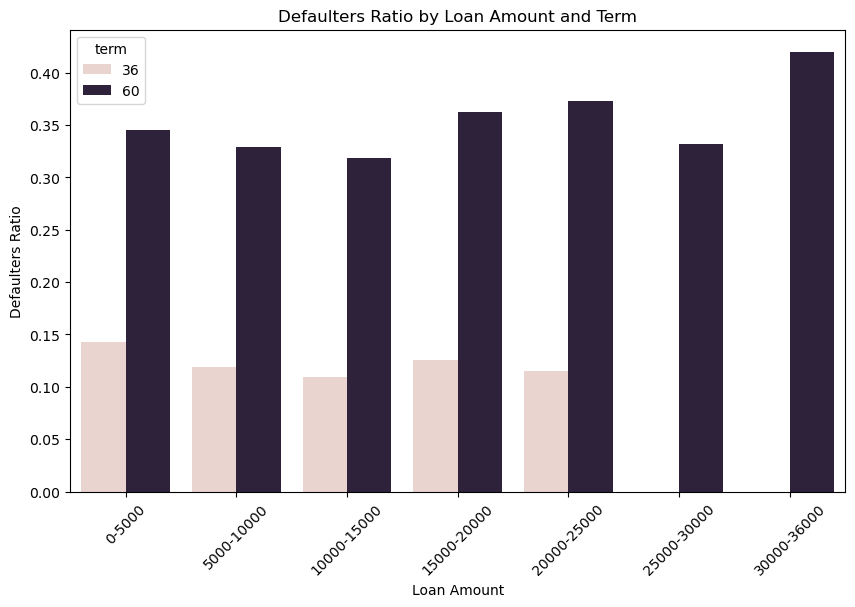

In [49]:
# Let's find correlation between Loan Amount and Term for loan status

# Let's bin the loan amount and create a pivot table

df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 36000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-36000'])

grouped = df.groupby(['loan_amnt_bins', 'term', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='term', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Term')
plt.xticks(rotation=45)
plt.show()


We observe that defaulters ratio increases for every term in each loan_amnt_bin and the trend is consistent. 

So we notice defaulters usually go for 60 month term period irrespective of the loan amount. That is something we can watch out for when giving out loans

loan_status                   Charged Off  Fully Paid     ratio
loan_amnt_bins int_rate_bins                                   
0-5000         5-10                   288        3213  0.089636
               10-15                  666        3698  0.180097
               15-20                  296         854  0.346604
               20-25                   10          25  0.400000
5000-10000     5-10                   302        4433  0.068125
               10-15                  827        4719  0.175249
               15-20                  403        1307  0.308340
               20-25                   23          37  0.621622
10000-15000    5-10                   136        2032  0.066929
               10-15                  478        2887  0.165570
               15-20                  325        1070  0.303738
               20-25                   45          52  0.865385
15000-20000    5-10                    38         671  0.056632
               10-15                  32

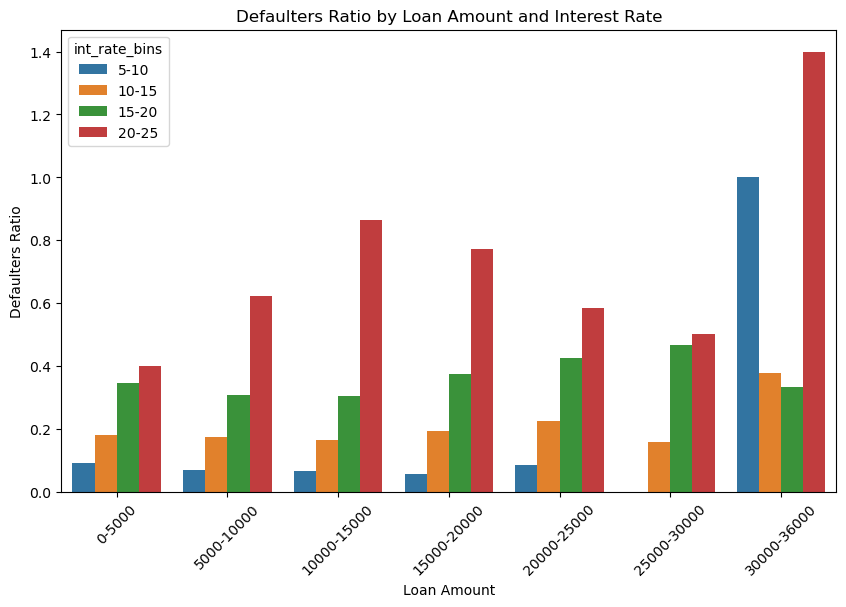

In [50]:
# Let's analyze for Interest Rate and Loan Amount for loan status

# Let's reuse the bins for loan amount and create a pivot table

# Let's create bins for interest rate

int_bins = [5, 10, 15, 20, 25]

df['int_rate_bins'] = pd.cut(df['int_rate'], bins=int_bins, labels=['5-10', '10-15', '15-20', '20-25'])

grouped = df.groupby(['loan_amnt_bins', 'int_rate_bins', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='int_rate_bins', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Interest Rate')
plt.xticks(rotation=45)
plt.show()



We observe the increase in defaulters ratio as the interest rate increases in each loan_amnt_bins. So we can conclude that higher interest rate may lead to higher number of defaulters regardless of the loan amount

loan_status                     Charged Off  Fully Paid     ratio
loan_amnt_bins annual_inc_bins                                   
0-5000         0-25000                  296        1302  0.227343
               25000-50000              601        3421  0.175680
               50000-75000              268        1968  0.136179
               75000-100000              66         735  0.089796
               100000-125000             20         278  0.071942
               125000-150000              9          86  0.104651
5000-10000     0-25000                  159         668  0.238024
               25000-50000              727        4196  0.173260
               50000-75000              442        3411  0.129581
               75000-100000             151        1467  0.102931
               100000-125000             48         563  0.085258
               125000-150000             28         191  0.146597
10000-15000    0-25000                   24          66  0.363636
          

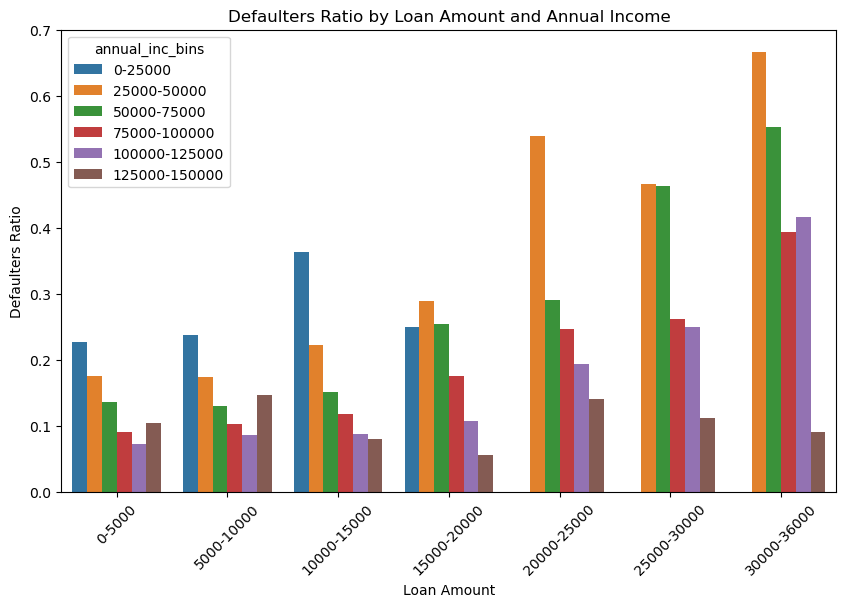

In [51]:
# Let's analyse for Loan Amount and Annual Income for loan status

# Let's reuse the bins for loan amount and create a pivot table

# Let's create bins for annual income

inc_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]

df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=inc_bins, labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000'])

grouped = df.groupby(['loan_amnt_bins', 'annual_inc_bins', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='annual_inc_bins', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Annual Income')
plt.xticks(rotation=45)
plt.show()


We can observe a trend that as annual income increases the defaulters ratio decreases regardless of the loan amount

loan_status                Charged Off  Fully Paid     ratio
loan_amnt_bins emp_length                                   
0-5000         0                   280        1494  0.187416
               1                   111         741  0.149798
               2                   159         982  0.161914
               3                   145         831  0.174489
               4                   113         658  0.171733
...                                ...         ...       ...
30000-36000    6                     1           7  0.142857
               7                     2           3  0.666667
               8                     2           3  0.666667
               9                     0           4  0.000000
               10                   15          47  0.319149

[77 rows x 3 columns]


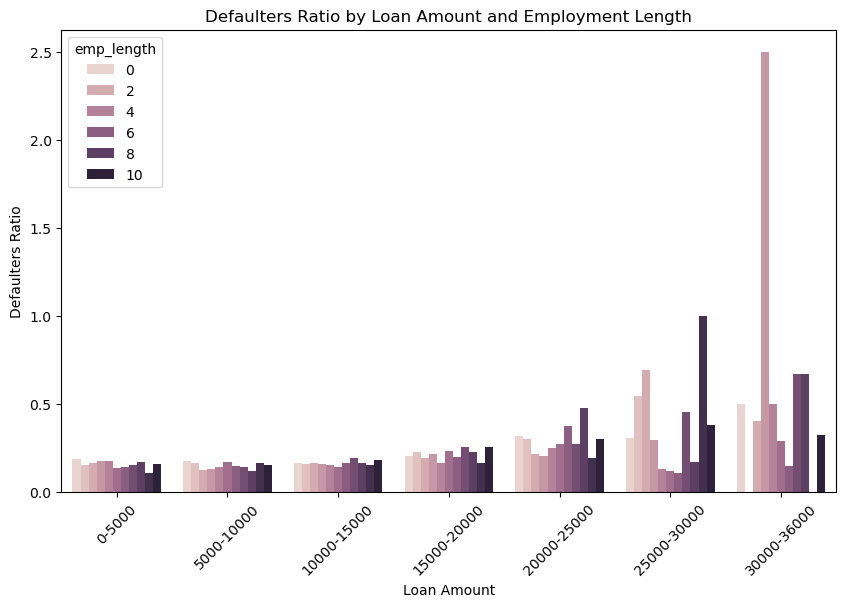

In [52]:
# Let's analyze for Loan Amount and Employment Length for loan status

# Let's reuse the bins for loan amount and create a pivot table

grouped = df.groupby(['loan_amnt_bins', 'emp_length', 'loan_status'])

pivot = grouped['member_id'].count().unstack()

pivot['ratio'] = pivot['Charged Off'] / pivot['Fully Paid']

print(pivot)

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='ratio', hue='emp_length', data=pivot.reset_index())
plt.xlabel('Loan Amount')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and Employment Length')
plt.xticks(rotation=45)
plt.show()

We do not observe any relation between employment length and Loan Amount with respect to defaulters ratio

loan_status              Charged Off  Fully Paid     ratio
term purpose                                              
36   car                          79         842  0.093824
     credit_card                 280        3341  0.083807
     debt_consolidation         1307       10346  0.126329
     educational                  44         233  0.188841
     home_improvement            171        1553  0.110109
     house                        25         192  0.130208
     major_purchase              125        1461  0.085558
     medical                      67         412  0.162621
     moving                       70         375  0.186667
     other                       383        2507  0.152772
     renewable_energy             11          51  0.215686
     small_business              219         792  0.276515
     vacation                     36         263  0.136882
     wedding                      55         622  0.088424
60   car                          74         405  0.1827

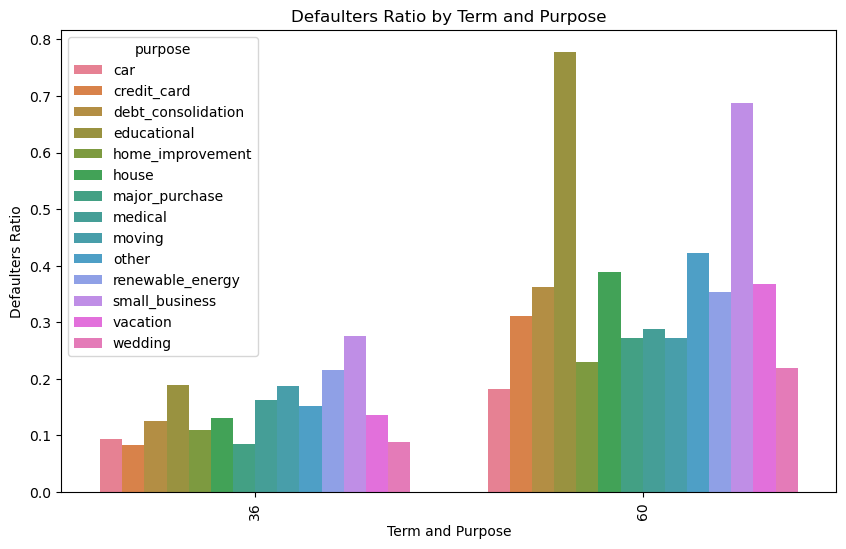

In [53]:
# Let's analyze for Term and Purpose for loan status

grouped = df.groupby(['term', 'purpose', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']
print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='ratio', hue='purpose', data=grouped.reset_index())
plt.xlabel('Term and Purpose')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term and Purpose')
plt.xticks(rotation=90)
plt.show()


We observe high defaulters ratio for purposes like "small_business" regardless of term.



loan_status         Charged Off  Fully Paid     ratio
term int_rate_bins                                   
36   5-10                   693        9929  0.069796
     10-15                 1661       10949  0.151703
     15-20                  504        2095  0.240573
     20-25                   14          17  0.823529
60   5-10                    89         631  0.141046
     10-15                  821        2868  0.286262
     15-20                 1014        2382  0.425693
     20-25                  185         279  0.663082


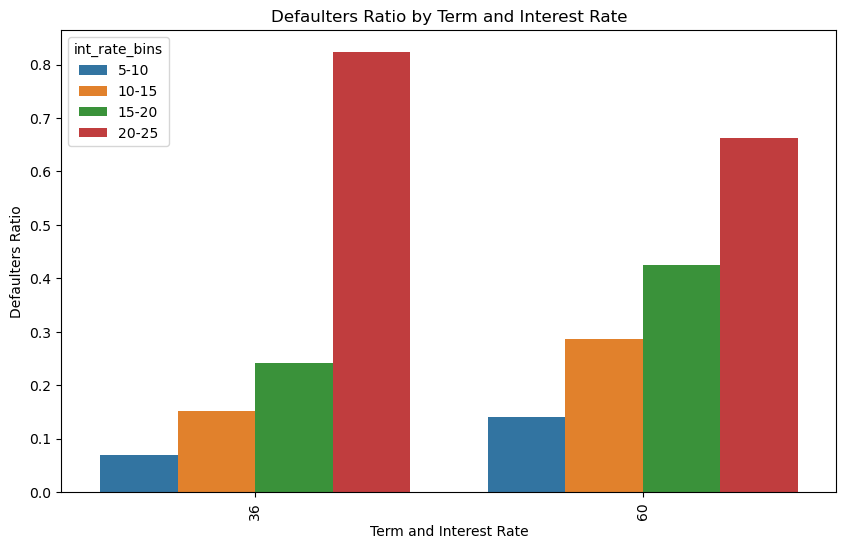

In [54]:
# Let's analyse for Term and Interest Rate for loan status

grouped = df.groupby(['term', 'int_rate_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='ratio', hue='int_rate_bins', data=grouped.reset_index())
plt.xlabel('Term and Interest Rate')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Term and Interest Rate')
plt.xticks(rotation=90)
plt.show()

We observe high defaulters ratio as the interest rate increases regardless of the term

loan_status              Charged Off  Fully Paid     ratio
purpose annual_inc_bins                                   
car     0-25000                   17         116  0.146552
        25000-50000               67         465  0.144086
        50000-75000               39         393  0.099237
        75000-100000              21         172  0.122093
        100000-125000              7          76  0.092105
...                              ...         ...       ...
wedding 25000-50000               36         266  0.135338
        50000-75000               27         293  0.092150
        75000-100000              12         105  0.114286
        100000-125000              5          54  0.092593
        125000-150000              3          22  0.136364

[84 rows x 3 columns]


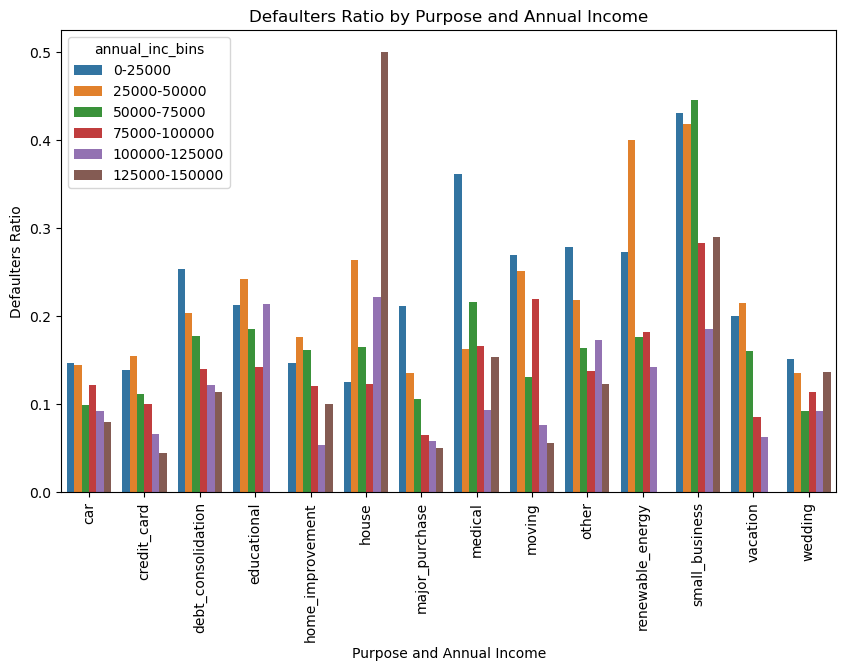

In [55]:
# Let's analyze for Purpose and Annual Income for loan status

grouped = df.groupby(['purpose', 'annual_inc_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='ratio', hue='annual_inc_bins', data=grouped.reset_index())
plt.xlabel('Purpose and Annual Income')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose and Annual Income')
plt.xticks(rotation=90)
plt.show()

We don't observe any corellation between purpose and annual income wrt defaulters. Each purpose has different defaulters of different annual income bins


loan_status                          Charged Off  Fully Paid     ratio
purpose            installment_bins                                   
car                0-200                      99         838  0.118138
                   200-500                    47         387  0.121447
                   500-800                     7          22  0.318182
                   800-1600                    0           0       NaN
credit_card        0-200                     124        1148  0.108014
                   200-500                   283        2260  0.125221
                   500-800                    71         568  0.125000
                   800-1600                    0           0       NaN
debt_consolidation 0-200                     617        3495  0.176538
                   200-500                  1384        7744  0.178719
                   500-800                   439        2238  0.196157
                   800-1600                    0           0       NaN
educat

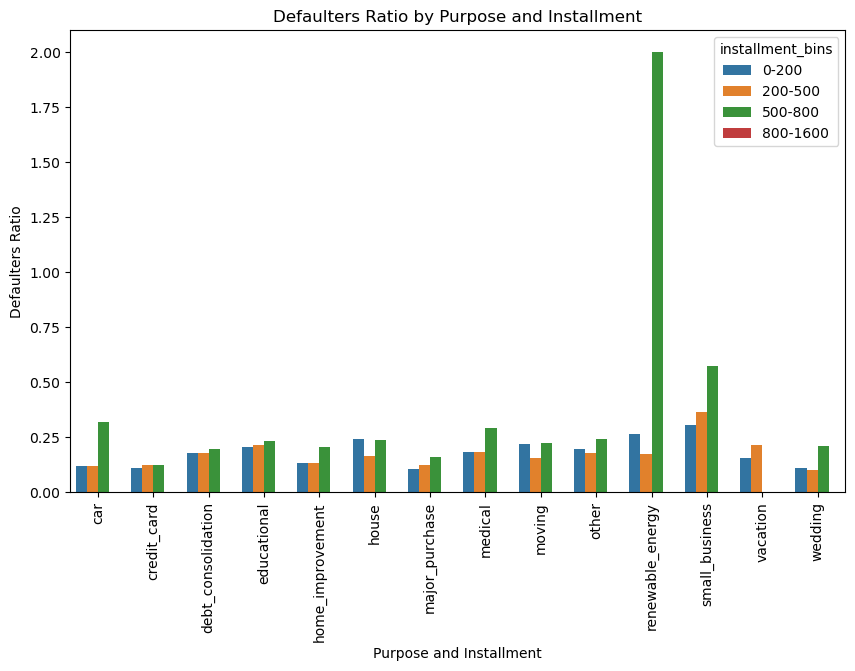

In [56]:
# Let's analyze for Purpose and Installment for loan status

# Let's create bins installment

bins = [0, 200, 500, 800, 1600]

df['installment_bins'] = pd.cut(df['installment'], bins=bins, labels=['0-200', '200-500', '500-800', '800-1600'])

grouped = df.groupby(['purpose', 'installment_bins','loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='ratio', hue='installment_bins', data=grouped.reset_index())
plt.xlabel('Purpose and Installment')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose and Installment')
plt.xticks(rotation=90)
plt.show()




Higher the installment -> higher the defaulters for most of the purpose except "small business"

loan_status                    Charged Off  Fully Paid     ratio
int_rate_bins annual_inc_bins                                   
5-10          0-25000                  100         748  0.133690
              25000-50000              354        3740  0.094652
              50000-75000              212        3436  0.061700
              75000-100000              78        1664  0.046875
              100000-125000             28         717  0.039052
              125000-150000             10         255  0.039216
10-15         0-25000                  255        1005  0.253731
              25000-50000             1080        5125  0.210732
              50000-75000              717        4353  0.164714
              75000-100000             295        2126  0.138758
              100000-125000             94         891  0.105499
              125000-150000             41         317  0.129338
15-20         0-25000                  119         278  0.428058
              25000-50000

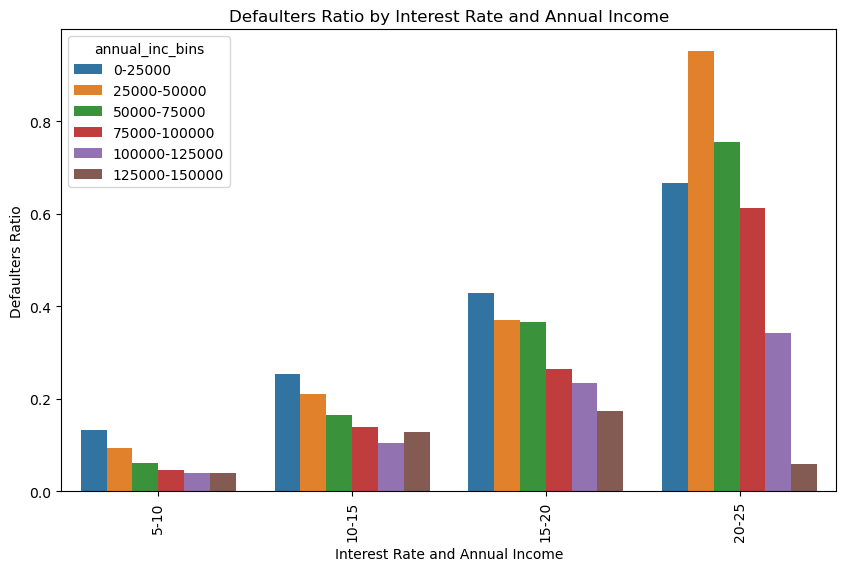

In [57]:
# Let's analyze for Interest Rate and Annual Income for loan status

grouped = df.groupby(['int_rate_bins', 'annual_inc_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's Plot a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate_bins', y='ratio', hue='annual_inc_bins', data=grouped.reset_index())
plt.xlabel('Interest Rate and Annual Income')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Interest Rate and Annual Income')
plt.xticks(rotation=90)
plt.show()

We observe as interest rate increases the defaulters increase and usually as annual income increases defaulters decrease and that is true for each interest rate bin

loan_status              Charged Off  Fully Paid     ratio
dti_bins loan_amnt_bins                                   
0-5      0-5000                  182        1385  0.131408
         5000-10000              185        1402  0.131954
         10000-15000              81         581  0.139415
         15000-20000              38         258  0.147287
         20000-25000              37          95  0.389474
         25000-30000               4          28  0.142857
         30000-36000               3          12  0.250000
5-10     0-5000                  240        1644  0.145985
         5000-10000              273        2302  0.118593
         10000-15000             188        1203  0.156276
         15000-20000              94         594  0.158249
         20000-25000              67         225  0.297778
         25000-30000              12          44  0.272727
         30000-36000               9          24  0.375000
10-15    0-5000                  288        1808  0.1592

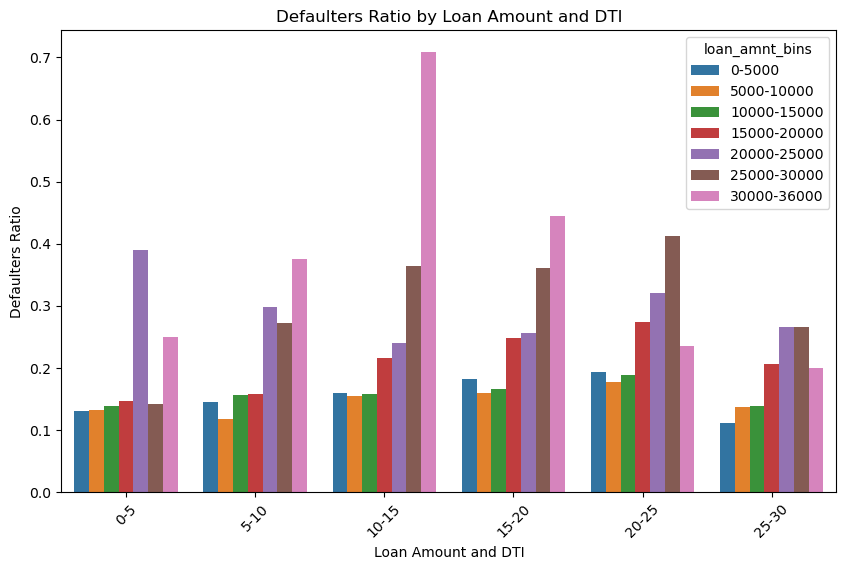

In [58]:
# Let's analyze for Loan Amount and dti for loan status

# Let's create bins for dti

bins = [0, 5, 10, 15, 20, 25, 30]

df['dti_bins'] = pd.cut(df['dti'], bins=bins, labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

grouped = df.groupby([ 'dti_bins', 'loan_amnt_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='dti_bins', y='ratio', hue='loan_amnt_bins', data=grouped.reset_index())
plt.xlabel('Loan Amount and DTI')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Loan Amount and DTI')
plt.xticks(rotation=45)
plt.show()


We don't observe increase in defaulters in each loan_amount_bins as dti increases

loan_status              Charged Off  Fully Paid     ratio
purpose revol_util_bins                                   
car     0-10                      12         234  0.051282
        10-20                     16         174  0.091954
        20-30                     21         168  0.125000
        30-40                     18         128  0.140625
        40-50                     14         111  0.126126
...                              ...         ...       ...
wedding 50-60                      8          65  0.123077
        60-70                     11          74  0.148649
        70-80                     11          53  0.207547
        80-90                     10          49  0.204082
        90-100                     6          41  0.146341

[140 rows x 3 columns]


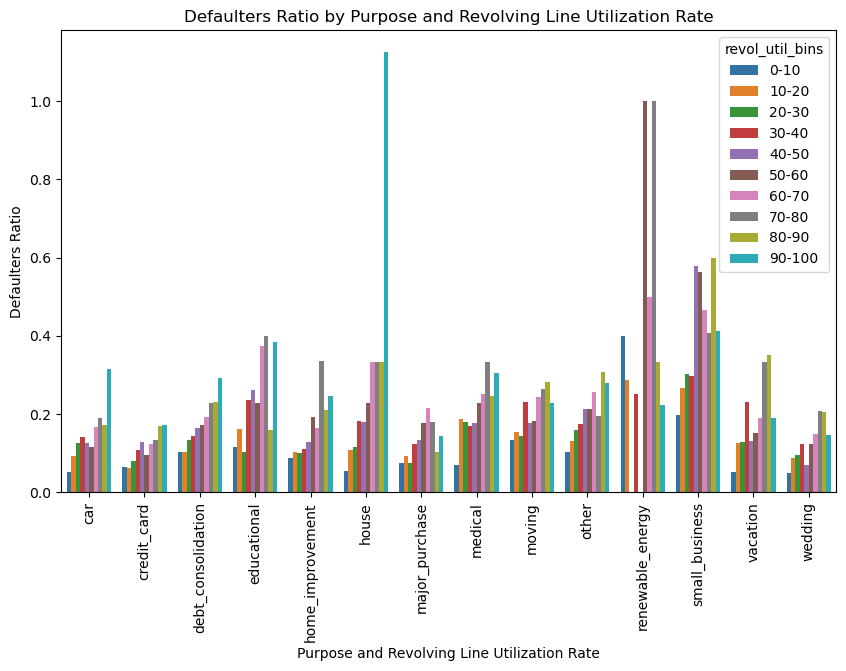

In [59]:
# Let's analyze for revol_util and purpose for loan status

# Let's bin revol_util

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['revol_util_bins'] = pd.cut(df['revol_util'], bins, labels=['0-10', '10-20', '20-30','30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
                               

grouped = df.groupby(['purpose', 'revol_util_bins', 'loan_status'])['member_id'].count().unstack()

grouped['ratio'] = grouped['Charged Off'] / grouped['Fully Paid']

print(grouped)

# Let's plot the ratio

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='ratio', hue='revol_util_bins', data=grouped.reset_index())
plt.xlabel('Purpose and Revolving Line Utilization Rate')
plt.ylabel('Defaulters Ratio')
plt.title('Defaulters Ratio by Purpose and Revolving Line Utilization Rate')
plt.xticks(rotation=90)
plt.show()

For each purpose, generally as revol_util increases the defaulters also increase

### Multi variate analysis

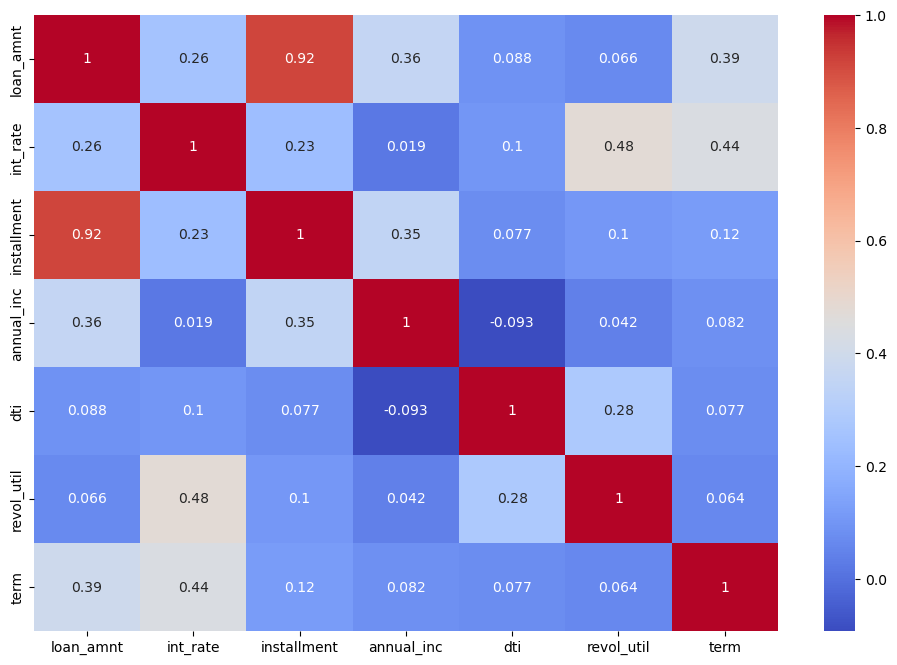

In [60]:
# Let's plot a heatmap for correlation between the numerical variables
continuous = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti", "revol_util", "term"]

plt.figure(figsize=(12, 8))
sns.heatmap(df[continuous].corr(), annot=True, cmap='coolwarm')
plt.show()

We see high correlation between 

- loan amount and installment